In [32]:
import pandas as pd
import glob
import os
import numpy as np
import pickle
import statistics
import community
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import analysis as an
import pandas as pd


import numpy as np
import seaborn as sns

from scipy import stats 
import scipy
import pprint as pp

In [2]:
labels = pd.read_csv('/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/mod_labels.csv', sep=',')

In [3]:
labels

,Index,label,Unnamed: 2,area,IC
0,73,R_Cerebellum,R_Cerebellum,Cerebellum,IC_73
1,59,R_Amygdala,R_Amygdala,Amygdala,IC_59
2,44,R_Auditory_18,R_A4_ROI,Auditory,IC_44
3,70,BrainStem,BrainStem,BrainStem,IC_70
4,79,BrainStem,BrainStem,BrainStem,IC_79
...,...,...,...,...,...
95,29,R_Visual_29,R_MST_ROI,Visual,IC_29
96,31,R_Visual_28,R_V3_ROI,Visual,IC_31
97,38,R_Visual_37,R_V2_ROI,Visual,IC_38
98,53,NaN,NaN,NaN,IC_53


In [4]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'6_*')
submod_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/6_submod_dict_08-31-2020_10-01-19


In [5]:
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'5_*')
summary_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/5_summary_dict_12-05-2019_03-29-19


In [48]:
summary_dict['NR']['no']['graphs'].nodes(data=True)

NodeDataView({0: {'centrality': 0.0064897671177409555, 'clustering': 0.6437710437710438, 'PC': -1.0326969056632502, 'modules': 0}, 1: {'centrality': 0.002973716896117888, 'clustering': 0.7468599033816425, 'PC': -136.6879917661603, 'modules': 1}, 2: {'centrality': 0.004613266626234078, 'clustering': 0.6115384615384616, 'PC': -2.5791553363466524, 'modules': 2}, 3: {'centrality': 0.0021067150470575765, 'clustering': 0.7252252252252253, 'PC': -1655.6730753160027, 'modules': 2}, 4: {'centrality': 0.005504181704497122, 'clustering': 0.6303191489361702, 'PC': -46.63350345353303, 'modules': 3}, 5: {'centrality': 0.005469547439511589, 'clustering': 0.581081081081081, 'PC': -7.605033006414443, 'modules': 1}, 6: {'centrality': 0.005565460193765314, 'clustering': 0.6334693877551021, 'PC': -0.9582213701859268, 'modules': 1}, 7: {'centrality': 0.0031554850913130426, 'clustering': 0.6693657219973009, 'PC': -37.85627528677132, 'modules': 2}, 8: {'centrality': 0.003099278857443236, 'clustering': 0.7323

In [6]:
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'7_*')
subgraph_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/7_subgraph_dict_08-31-2020_10-01-32


In [7]:
subgraph_dict['no'][0].nodes(data=True)

NodeDataView({0: {'centrality': 0.0064897671177409555, 'clustering': 0.6437710437710438, 'PC': 0.7357095304000456, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 0, 'sub_zDegree': 0.0}, 24: {'centrality': 0.01252232649388041, 'clustering': 0.6076388888888888, 'PC': 0.680346907450359, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 1, 'sub_zDegree': 0.0}, 38: {'centrality': 0.0065647443593222984, 'clustering': 0.5475609756097561, 'PC': 0.6335861534898246, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 2, 'sub_zDegree': 0.0}, 31: {'centrality': 0.011105955087203292, 'clustering': 0.6101694915254238, 'PC': 0.6983508309851283, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 3, 'sub_zDegree': 0.0}})

In [8]:
submod_dict['no'][0]

,centrality,clustering,PC,modules,zDegree,sub_modules,sub_zDegree,group,hub,node_type
0,0.006490,0.643771,0.735710,0,-0.344401,0,0.0,normal,no,connector
24,0.012522,0.607639,0.680347,0,-0.344401,1,0.0,normal,no,connector
38,0.006565,0.547561,0.633586,0,-0.344401,2,0.0,normal,no,connector
31,0.011106,0.610169,0.698351,0,-0.344401,3,0.0,normal,no,connector


In [9]:
for k,v in summary_dict['NR'].items():
    # community.induced_graph(partition dictionary, graph)
     comm_graph = community.induced_graph(v['modules']['partition'], v['graphs'])
     v.update(comm_graph = comm_graph)

In [10]:
edges = {}

for group, stuff in summary_dict['NR'].items():
    print(group)
    _df = nx.to_pandas_edgelist(stuff['comm_graph'])
#     _df[(_df['source'] != _df['target']), 'weight'] == 0
    _df.loc[(_df['source'] == _df['target']), 'weight'] = 0

    _df['group']=group
    edges[group]=_df

edge_df=pd.concat(list(edges.values()))

no
ov
ob


In [11]:
edge_df

,source,target,weight,group
0,0,0,0.000000,no
1,0,1,3.152175,no
2,0,2,-0.499674,no
3,0,3,-0.182275,no
4,0,4,-0.273101,no
...,...,...,...,...
40,6,7,0.296809,ob
41,6,8,0.585246,ob
42,7,7,0.000000,ob
43,7,8,0.624541,ob


In [12]:
summary_dict['NR']['no'].keys()

dict_keys(['mean_FC', 'graphs', 'clustering_coeff', 'btn_centrality', 'PC', 'modules', 'edge_btw', 'comm_graph'])

In [13]:
def zscore(col):
    col_z = (col - col.mean())/col.std(ddof=0)
    return(col_z)

In [14]:
edge_df['z_weight']=zscore(edge_df['weight'])

09-01-2020_10-44-02 NumExpr defaulting to 4 threads. 


In [15]:
for k,v in summary_dict['NR'].items():
    test=edge_df[edge_df['group']==k]
    keyz = list(zip(test['source'],test['target']))
    values=test['z_weight']
    up_dict={}
    for i in range(len(keyz)):
        up_dict[keyz[i]]={'z_edge':values[i]}
    nx.set_edge_attributes(v['comm_graph'], up_dict)


In [16]:
aes_dict={'no':{},
          'ov':{},
          'ob':{}}
for group, stuff in summary_dict['NR'].items():
    print(group)
    G=stuff['comm_graph']
    aes_dict[group]=an.aesthetics(G,15000,100, 'sans-serif', 'Bold', 'z_edge', (80,50), 1)

no
8
ov
10
ob
9


In [17]:
for key, graph in summary_dict['NR'].items():
    print(key)
    G=graph['comm_graph']
    aes=aes_dict[key]
    an.module_fig(G,'%s z-score'%key, basepath, aes)

no
8
8
[0.4375 1.3125 2.1875 3.0625 3.9375 4.8125 5.6875 6.5625]
ov
10
10
[0.45 1.35 2.25 3.15 4.05 4.95 5.85 6.75 7.65 8.55]
ob
9
9
[0.44444444 1.33333333 2.22222222 3.11111111 4.         4.88888889
 5.77777778 6.66666667 7.55555556]


In [18]:
labels

,Index,label,Unnamed: 2,area,IC
0,73,R_Cerebellum,R_Cerebellum,Cerebellum,IC_73
1,59,R_Amygdala,R_Amygdala,Amygdala,IC_59
2,44,R_Auditory_18,R_A4_ROI,Auditory,IC_44
3,70,BrainStem,BrainStem,BrainStem,IC_70
4,79,BrainStem,BrainStem,BrainStem,IC_79
...,...,...,...,...,...
95,29,R_Visual_29,R_MST_ROI,Visual,IC_29
96,31,R_Visual_28,R_V3_ROI,Visual,IC_31
97,38,R_Visual_37,R_V2_ROI,Visual,IC_38
98,53,NaN,NaN,NaN,IC_53


In [19]:
labels.set_index('Index', inplace=True)

In [20]:
lab_dict=labels.to_dict('index')

In [21]:
for group, mods in subgraph_dict.items():
    for mod, G in mods.items():
        nx.set_node_attributes(G,lab_dict, "labels")

In [22]:
g=subgraph_dict['no'][1]

In [24]:
nodes, color = zip(*nx.get_node_attributes(g, 'labels').items())

In [25]:
nx.get_node_attributes(g, 'labels')[1]['area']
# nx.get_node_attributes(g, 'labels').values()


'Default'

In [26]:
new={}
for x,y in nx.get_node_attributes(g, 'labels').items():
#     print(x)
    new[x]=y['area']

1
6
11
13
23
32
39
45
47
49
50
51
52
53
54
55
56
58
60
65
73


In [27]:
new

{1: 'Default',
 6: 'FrontoParietal',
 11: 'Default',
 13: 'DorsalAttn',
 23: 'FrontoParietal',
 32: 'FrontoParietal',
 39: 'FrontoParietal',
 45: 'Cerebellum',
 47: 'FrontoParietal',
 49: 'Cerebellum',
 50: 'Cerebellum',
 51: 'Cerebellum',
 52: 'Cerebellum',
 53: nan,
 54: 'Cerebellum',
 55: 'Cerebellum',
 56: 'Cerebellum',
 58: 'Cerebellum',
 60: nan,
 65: 'Cerebellum',
 73: 'Cerebellum'}

In [28]:
for x in color:
    print(x['area'])

Default
FrontoParietal
Default
DorsalAttn
FrontoParietal
FrontoParietal
FrontoParietal
Cerebellum
FrontoParietal
Cerebellum
Cerebellum
Cerebellum
Cerebellum
nan
Cerebellum
Cerebellum
Cerebellum
Cerebellum
nan
Cerebellum
Cerebellum


In [29]:
def aesthetics(graph, node_size, font_size, font_family, font_weight, edge_att, plot_size, mod):
    aes={'general':{},
         'nodes':{},
         'edges':{}}
    # nodes
    color = np.array(list(graph.nodes))
    color = np.array(color)
    n_color=len(list(set(color)))
    print(n_color)
    aes['nodes']['color'] = color
    aes['nodes']['colormap'] = ['Set3', n_color]
    aes['nodes']['n_color'] = n_color
    aes['nodes']['max'] = float(color.max())
    aes['nodes']['min'] = float(color.min())
    aes['nodes']['font_size'] = int(font_size)
    aes['nodes']['font_family'] = font_family
    aes['nodes']['font_weight'] = font_weight
    aes['nodes']['node_size'] = int(node_size)
    #edges
    aes['edges']['colormap'] = plt.cm.gist_rainbow
    edges,weights = zip(*nx.get_edge_attributes(graph,edge_att).items())
    weights=np.array(weights)
    aes['edges']['width mod'] = mod
    aes['edges']['min'] = weights.min()
    aes['edges']['max'] = weights.max()
    # General
    aes['general']['plot_size']=plot_size #tuple 80,50
    return(aes)

In [125]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def basic_graph(graph, scl, FONT, metric, size, tile, basepath, bmi, mod):
    #threshold
    e,w = zip(*nx.get_edge_attributes(graph, 'weight').items())
    purr=np.percentile(w, tile)
    g=an.threshold2(graph,purr)
    # style
    fig = plt.figure(figsize = size)
    ax1 = plt.subplot(111, aspect = 'equal')
    plt.subplots_adjust(left=0.25, bottom=0, right=0.75, top=1, wspace=0.2, hspace=0)

    positions=nx.circular_layout(g)
    
    # NODES
    nodes, color = zip(*nx.get_node_attributes(g, metric).items())
    nodes, label = zip(*nx.get_node_attributes(g, 'labels').items())
    nodes, size = zip(*nx.get_node_attributes(g, metric).items())
    new={}
    for x,y in nx.get_node_attributes(g, 'labels').items():
        new[x]=y['area']
    
    #draws nodes
    color = np.array(color)
    colz=stats.zscore(color)
    nColormap=plt.cm.cool 
    cM=colz.max()
    cm=colz.min()

    scale=scl/colz.max()
    nx.draw_networkx_nodes(g,
                             positions,
                             node_color=colz,
                             node_size=np.square(colz)*scale,
                             alpha=0.8,
                             cmap= nColormap,
                             vmin=cm ,vmax=cM)

    #Styling for labels
    nx.draw_networkx_labels(g, 
                            positions,
                            new,
                            font_size=FONT,
                            font_family='sans-serif',
                            fontweight = 'bold',
                            horizontalalignment = 'center',
                            verticalalignment = 'top')


    # EDGES 
    edges,weights = zip(*nx.get_edge_attributes(g, 'weight').items())
    #draw edges
    weights=np.array(weights)
    eColormap=plt.cm.gist_rainbow #check here if you want different colors https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    nx.draw_networkx_edges(g, 
                             positions,
                             edge_list=edges,
                             style='solid',
                             width = np.square(weights)*200,
                             edge_color = weights,
                             edge_cmap=eColormap,
                             edge_vmin=weights.min(),
                             edge_vmax=weights.max())
    
    #FInishing touches


    plt.axis('off')
    if bmi == 'no':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'Average BMI'), fontsize = FONT)
    if bmi == 'ov':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'High BMI'), fontsize = FONT)
    if bmi == 'ob':
        plt.title("%s and edge weights of \n %s graph"%(metric, 'Very high BMI'), fontsize = FONT)
    

    axins1 = inset_axes(ax1,
                    width="2.5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right',
                    bbox_to_anchor=(0.15, 0., 1, 1), #(x0, y0, width, height)
                    bbox_transform=ax1.transAxes,
                    borderpad=1)
    
    axins2 = inset_axes(ax1,
                    width="2.5%",  # width = 50% of parent_bbox width
                    height="100%",  # height : 5%
                    loc='right',
                    bbox_to_anchor=(.25, 0, 1, 1),
                    bbox_transform=ax1.transAxes,
                    borderpad=1)

    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = weights.min(), vmax=weights.max()))
    sm._A = []

    edge_bar=fig.colorbar(sm, cax=axins1, orientation="vertical")
    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(FONT)
    edge_bar.set_label('Strength of edge weight', fontsize = FONT)
    
    sn = plt.cm.ScalarMappable(cmap=nColormap, norm=plt.Normalize(vmin = cm, vmax=cM))
    sn._A = []
    
    rgb = sn.to_rgba(x=colz)
    save={}
    i = 0
    for x,y in nx.get_node_attributes(g, 'labels').items():
        save[x]=[y['IC'], y['area'], np.round(rgb[i]*255)]
        i=i+1
    
    node_bar=fig.colorbar(sn, cax=axins2, label='Module value')
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(FONT)
    node_bar.set_label('%s'%metric,fontsize = FONT)
    
    
    basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/images'
    if bmi == 'no':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'Average BMI', mod)), format="PNG")
    if bmi == 'ov':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'High BMI', mod)), format="PNG")
    if bmi == 'ob':
        plt.savefig(os.path.join(basepath,"%s_%s_%s.png"%(metric, 'Very high BMI', mod)), format="PNG")
    plt.show()
    return(save)


no
2


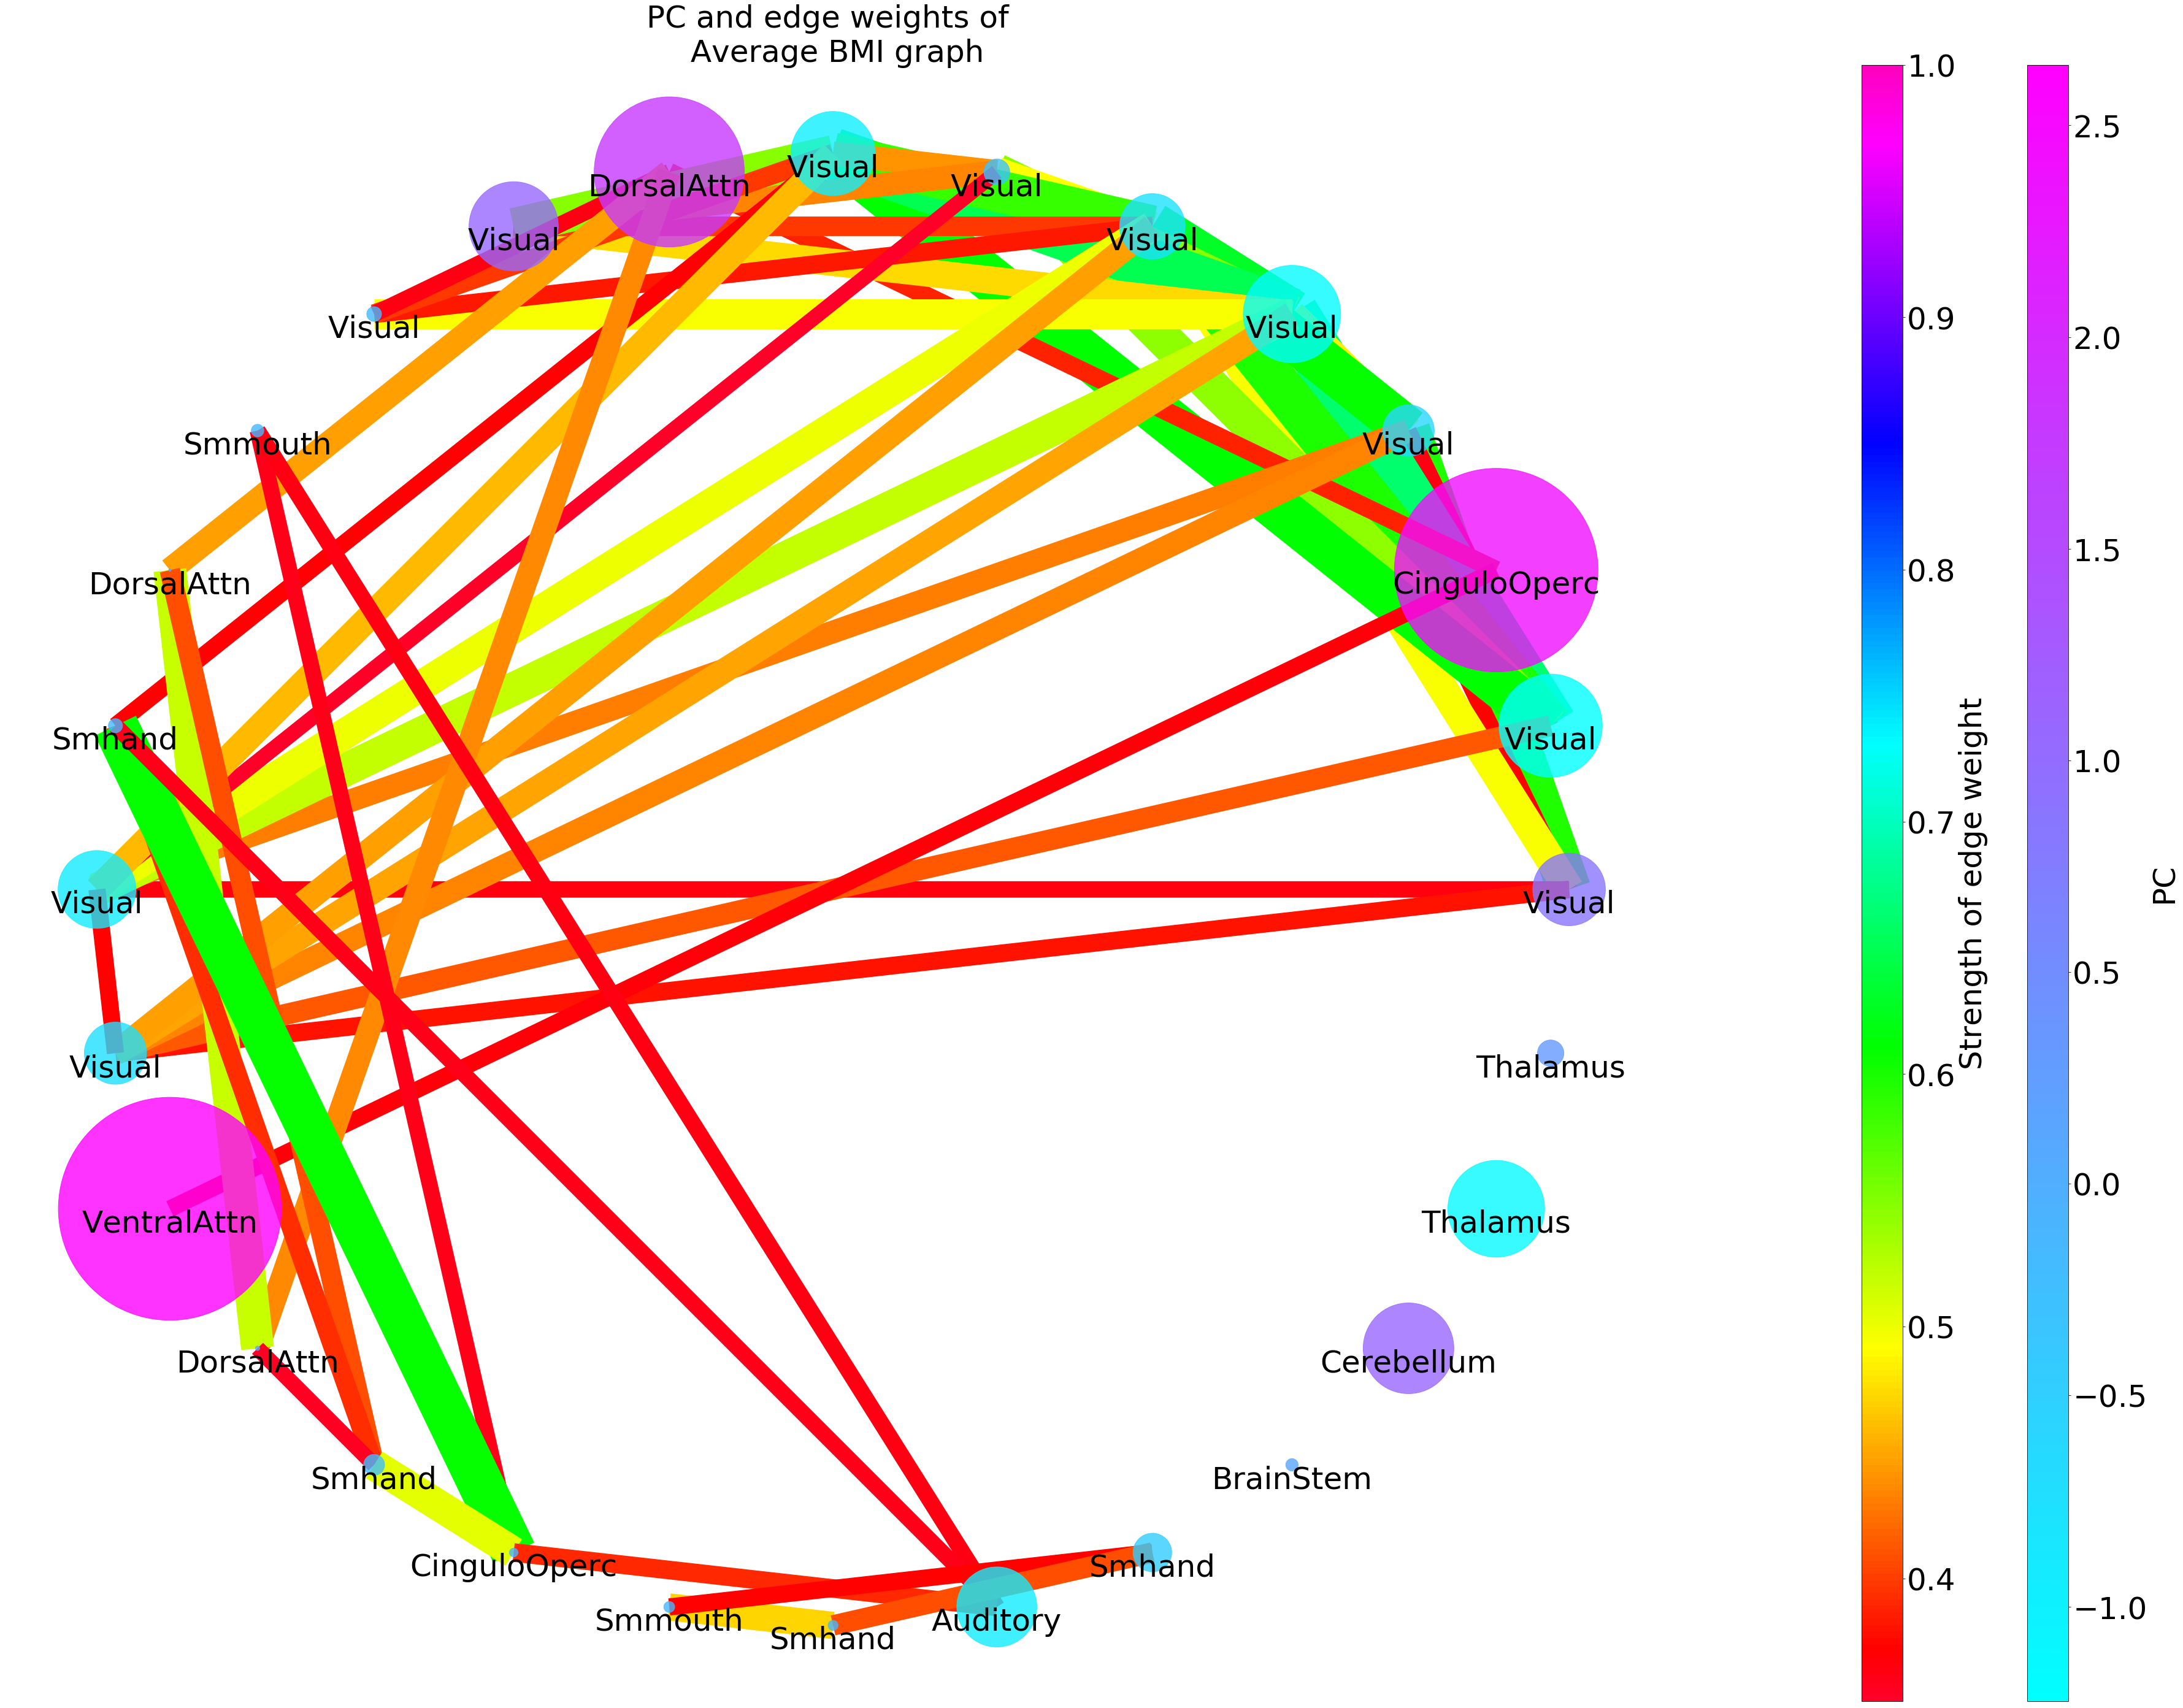

4


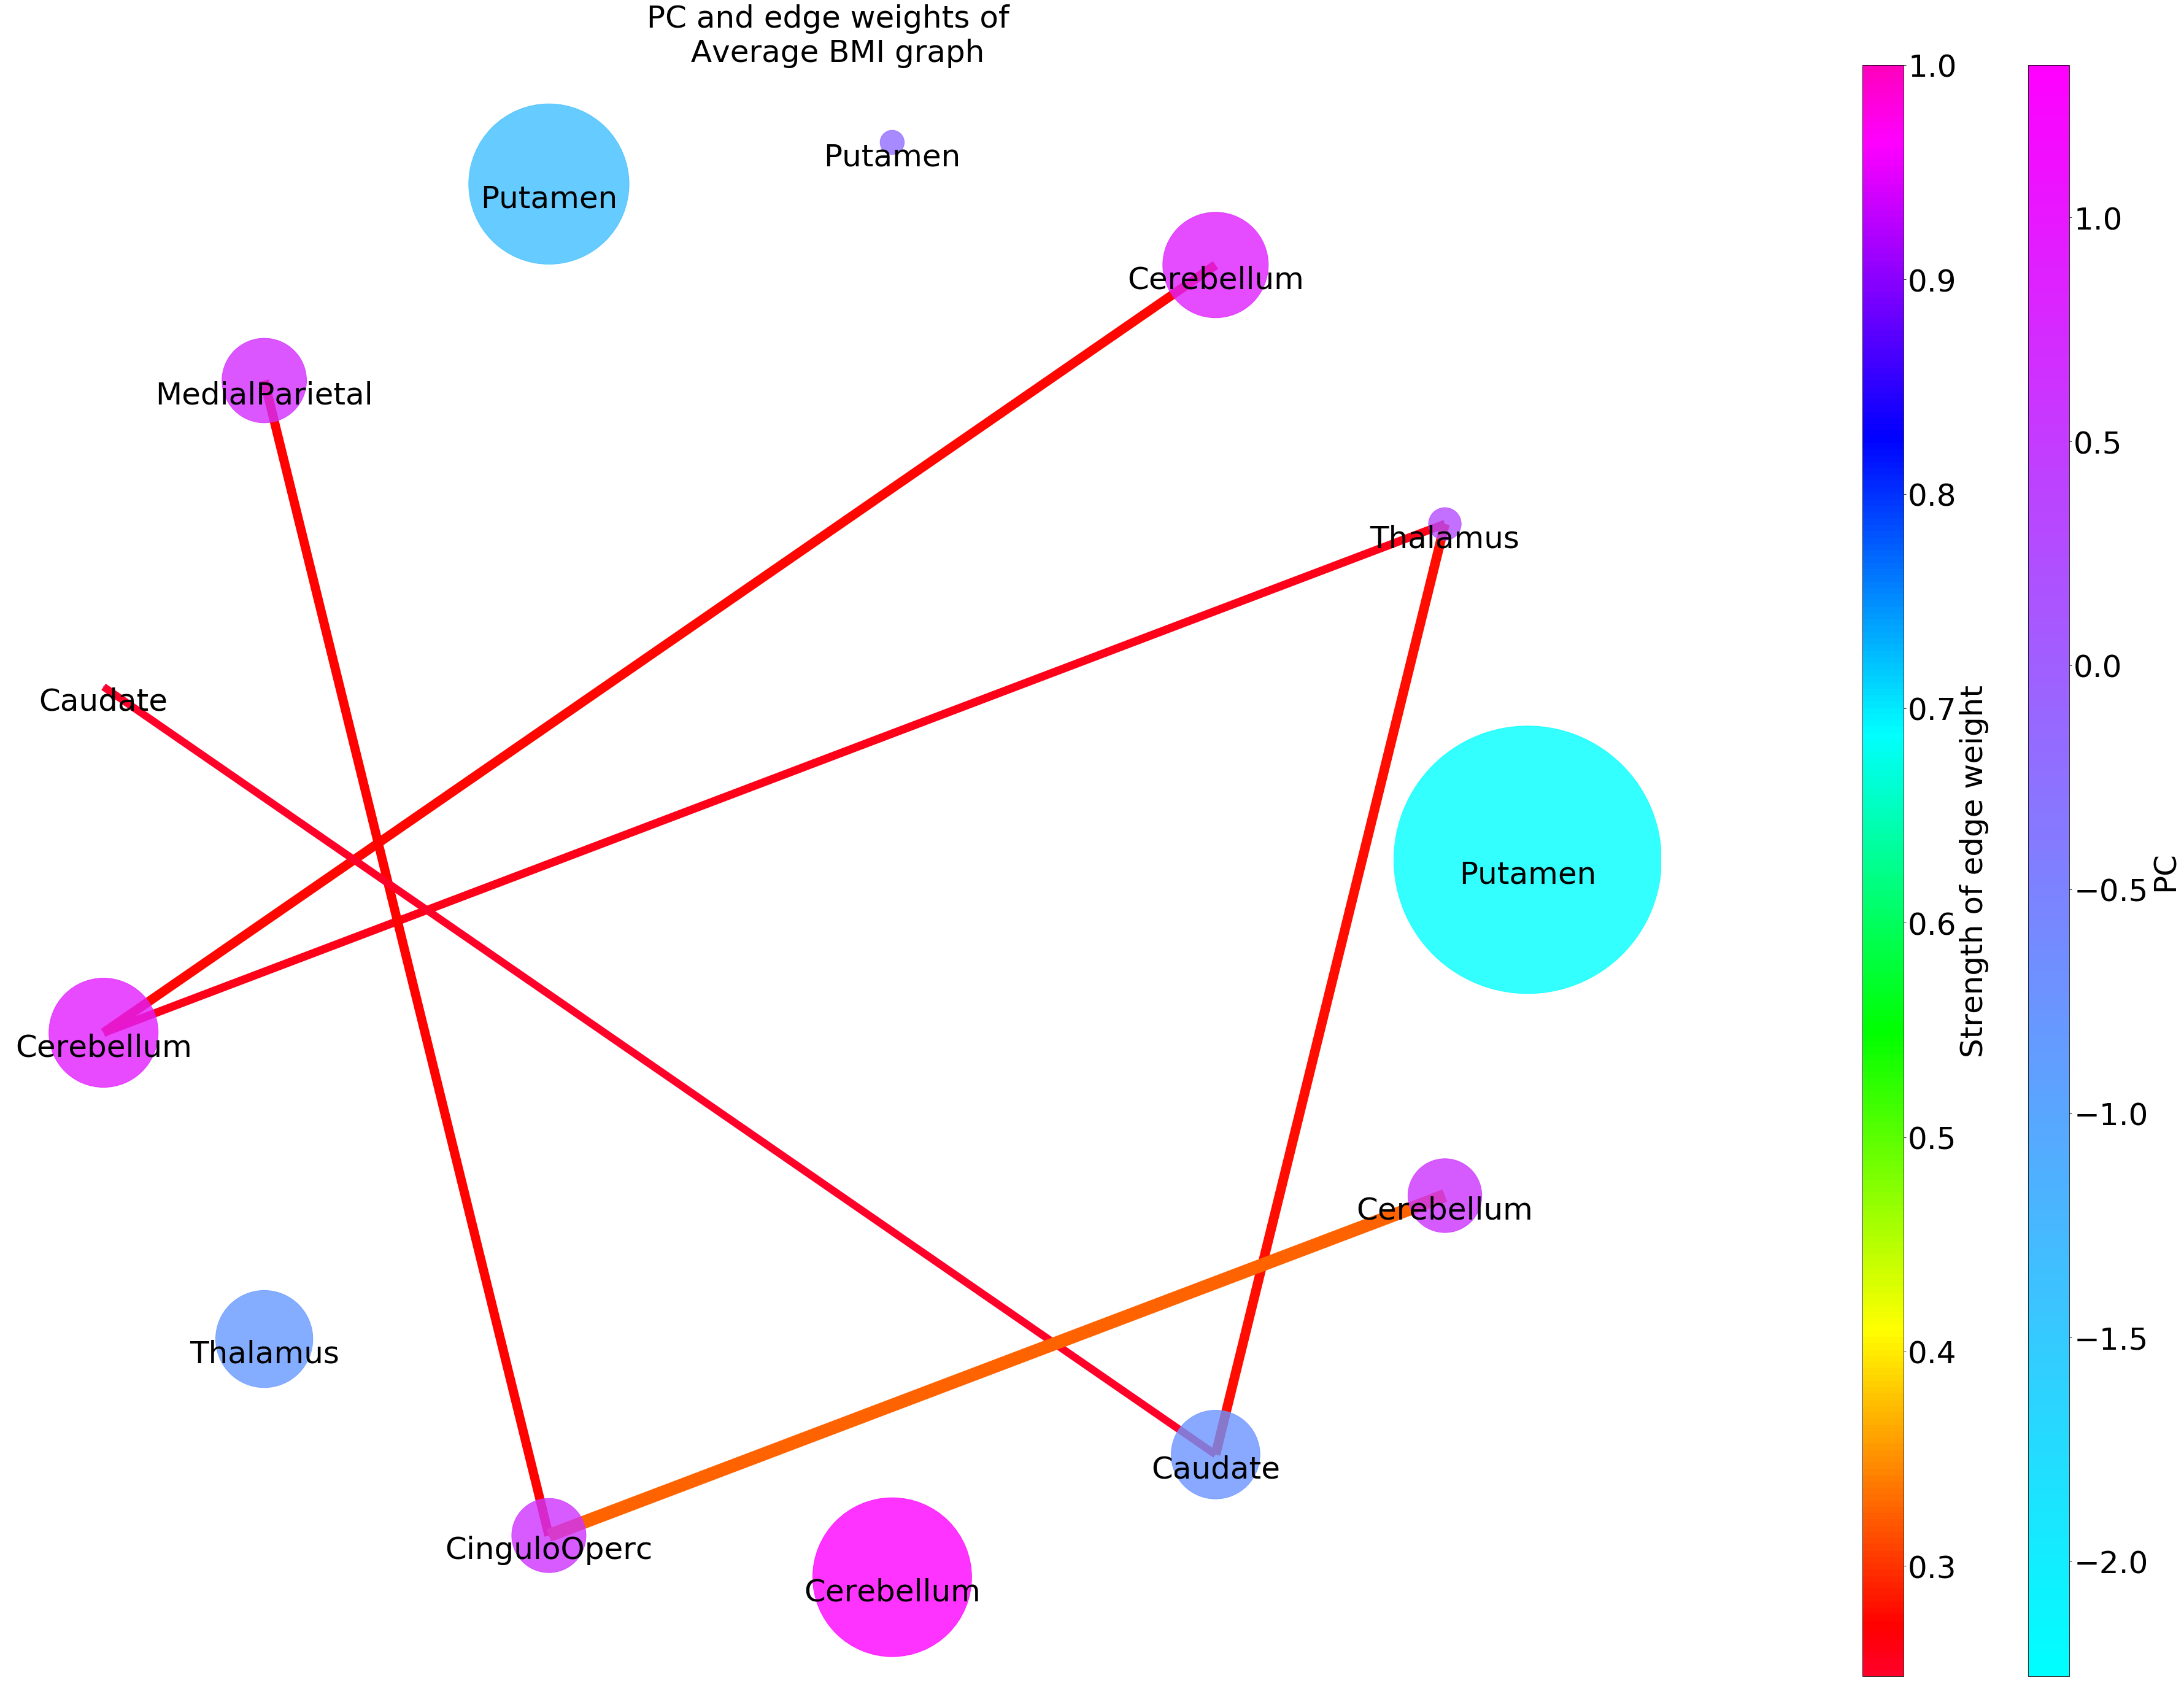

ov
0


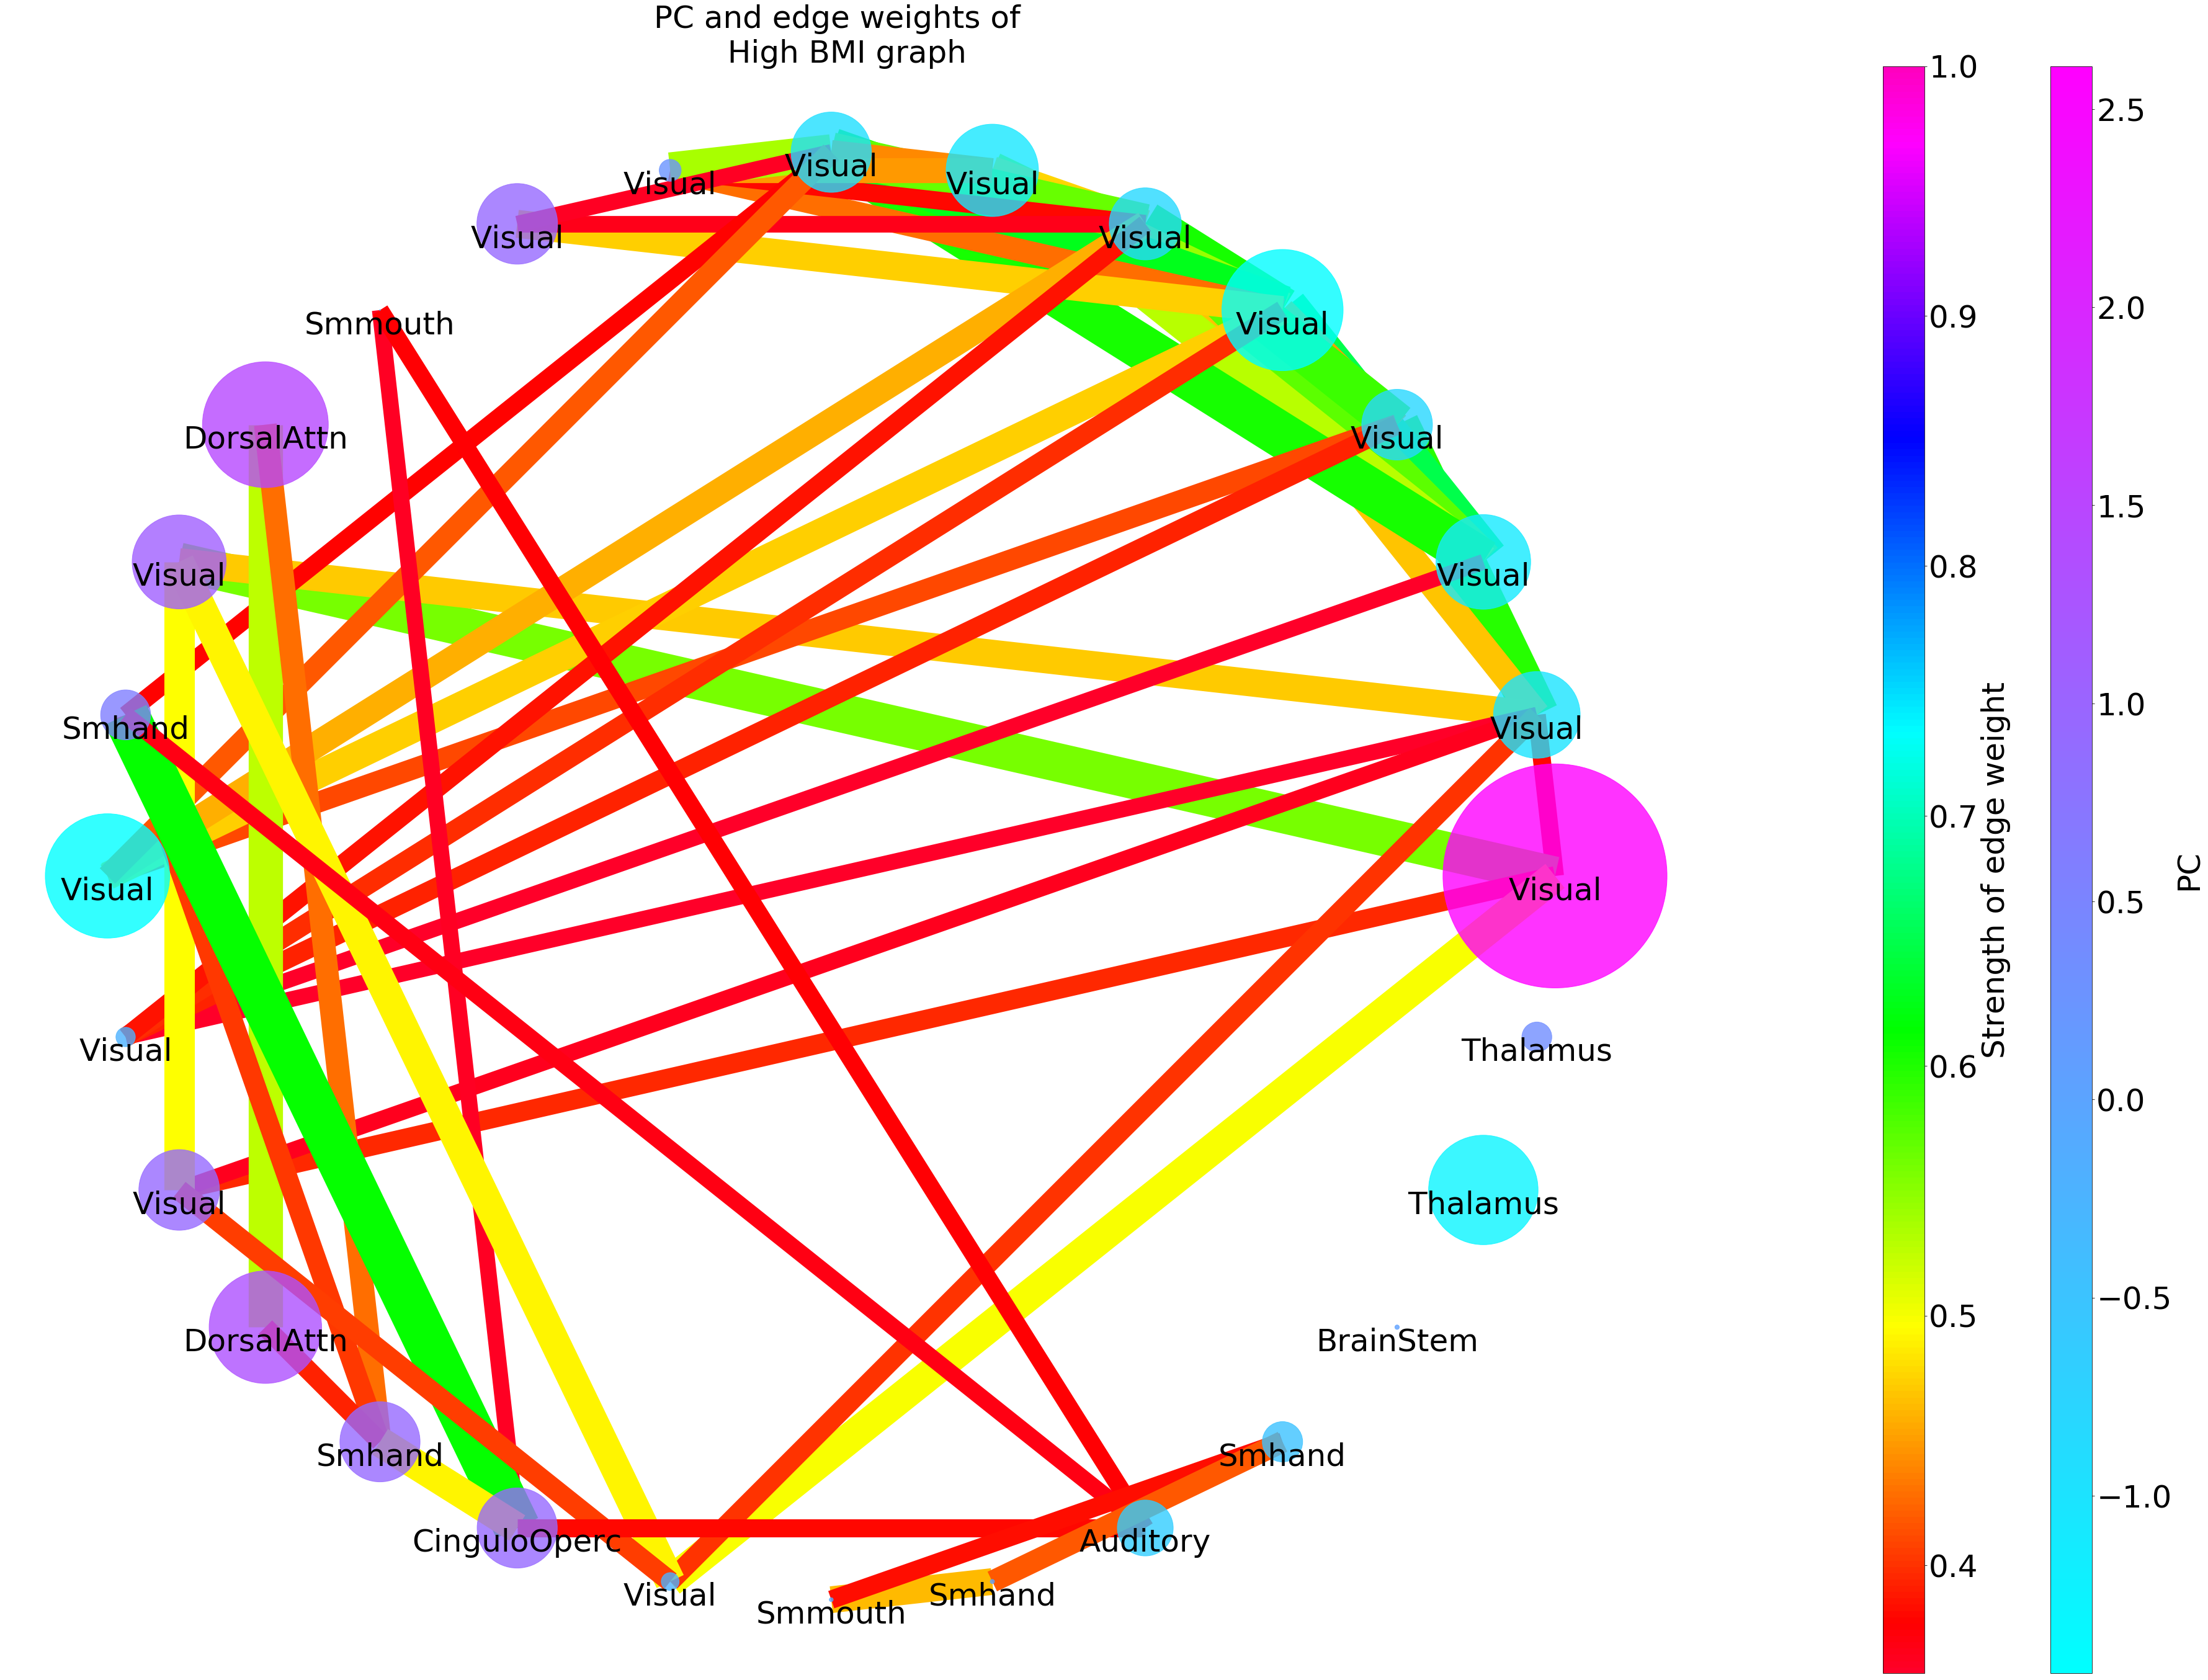

5


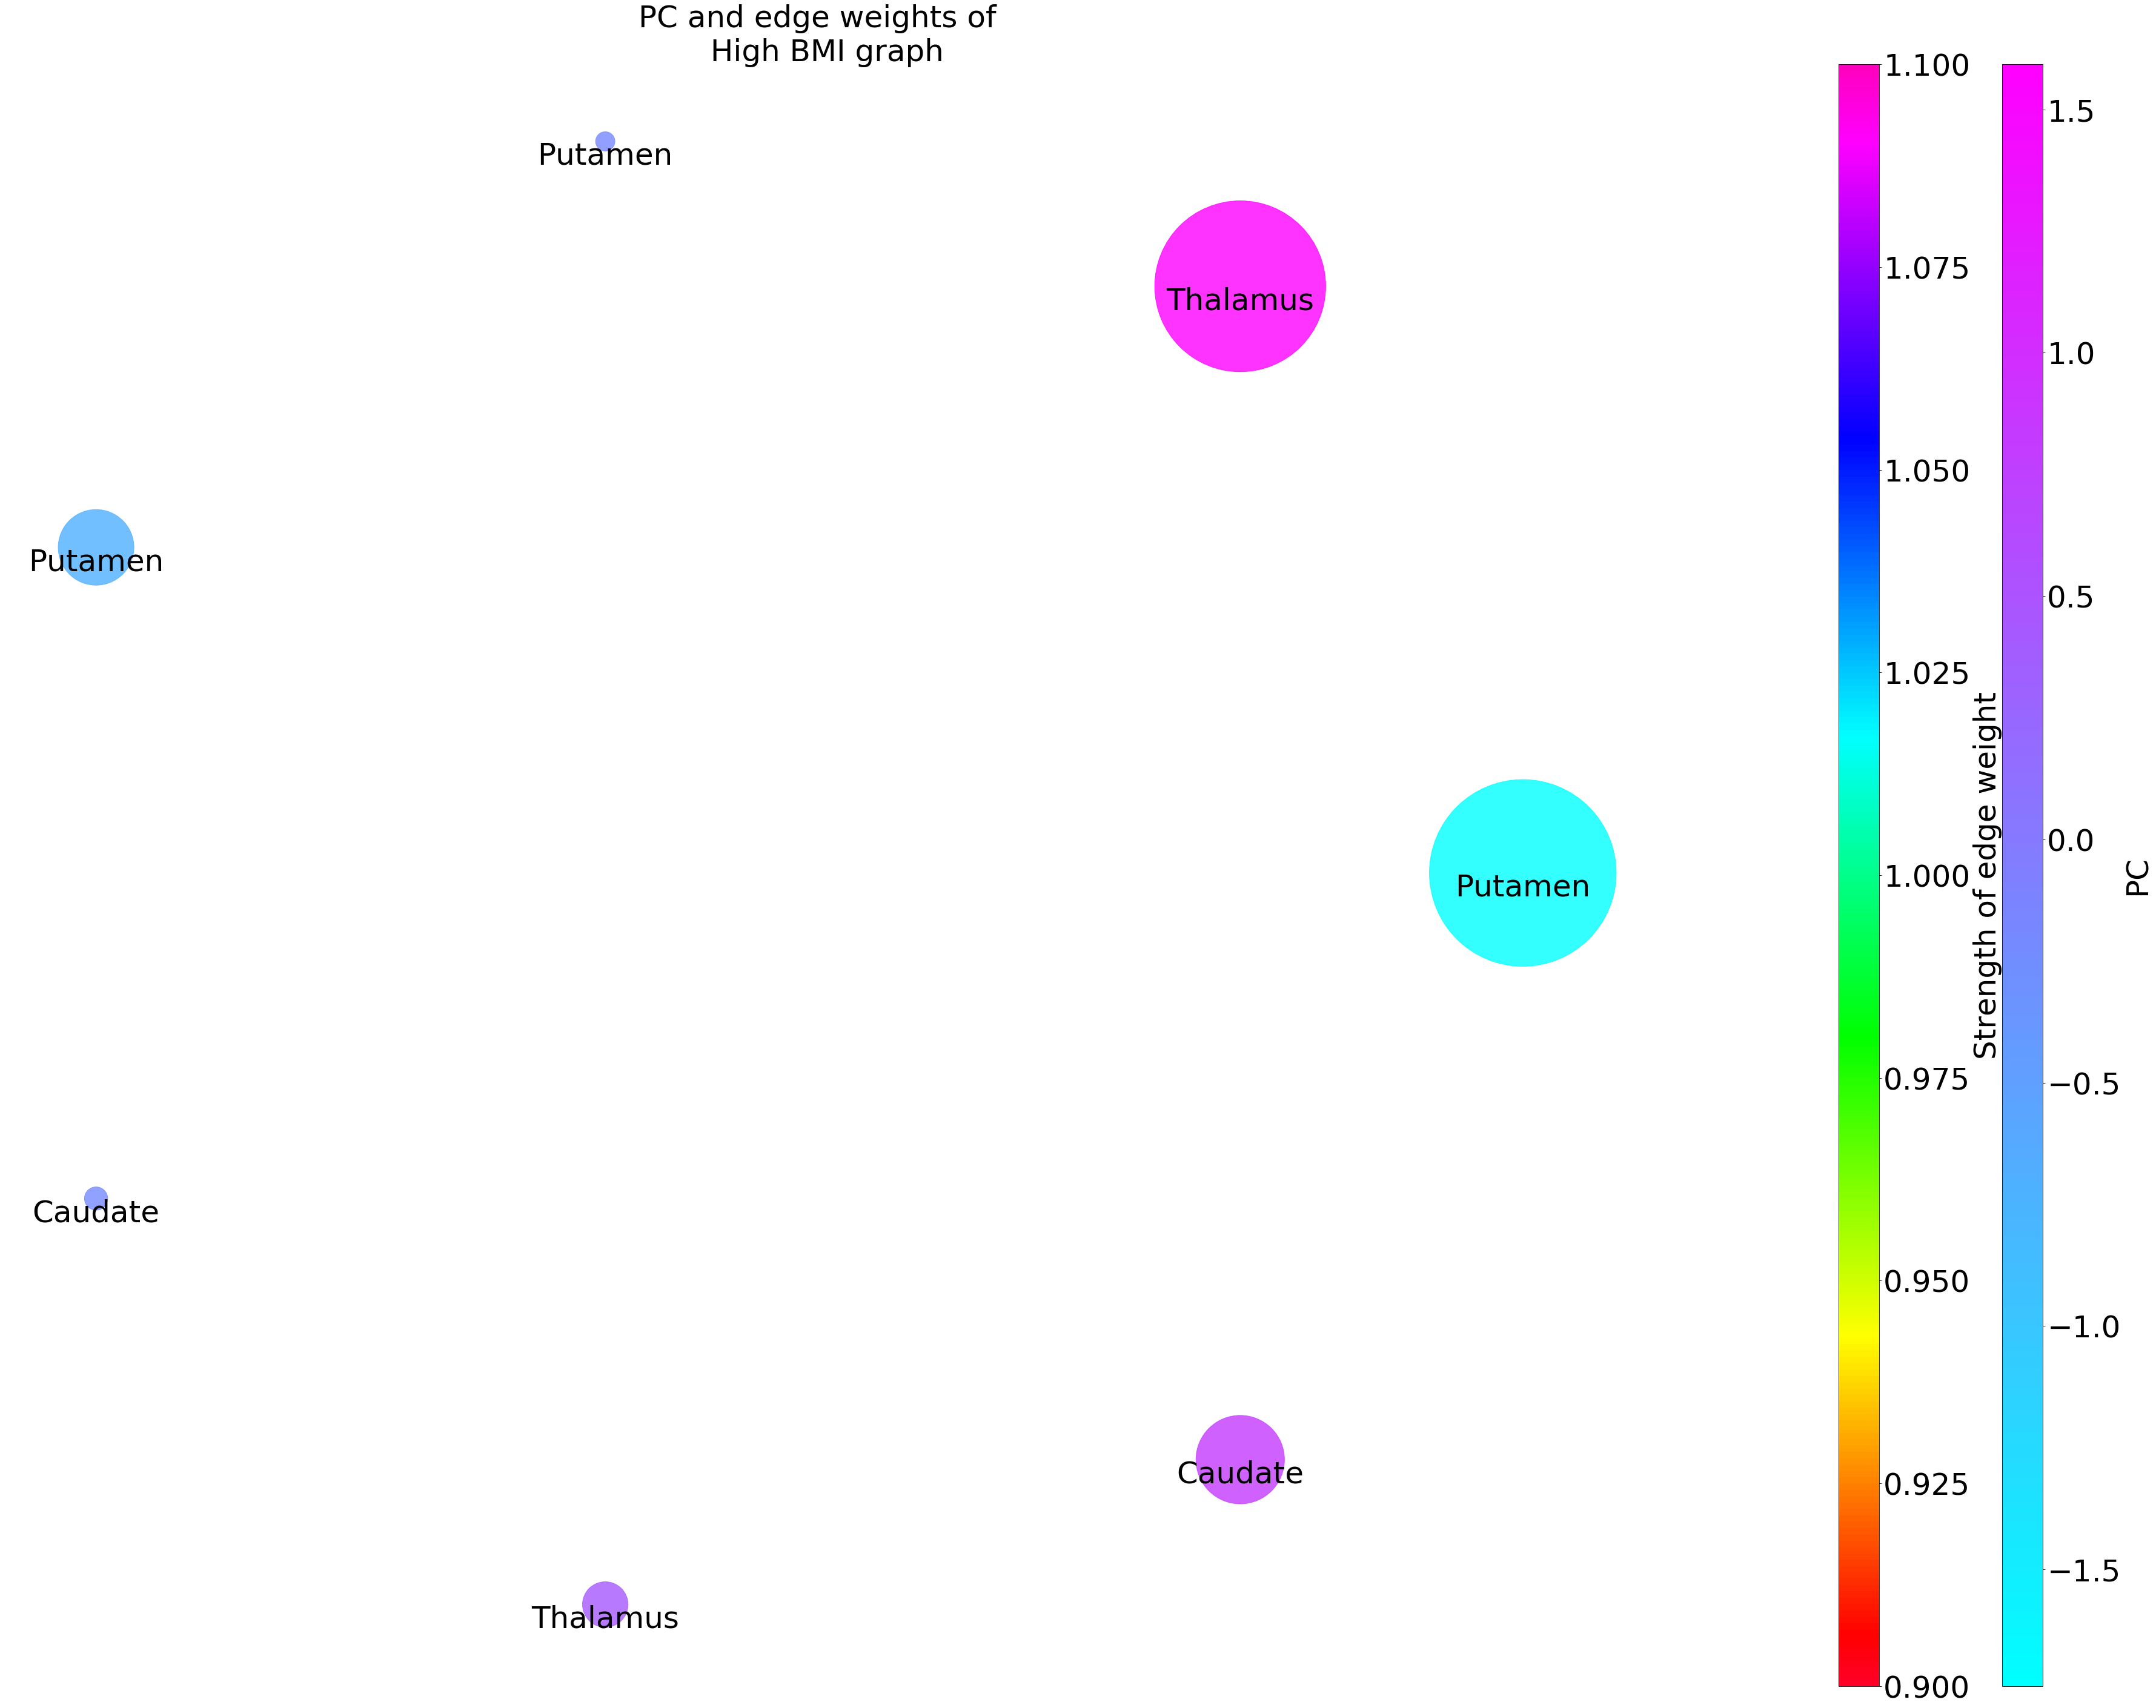

ob
2


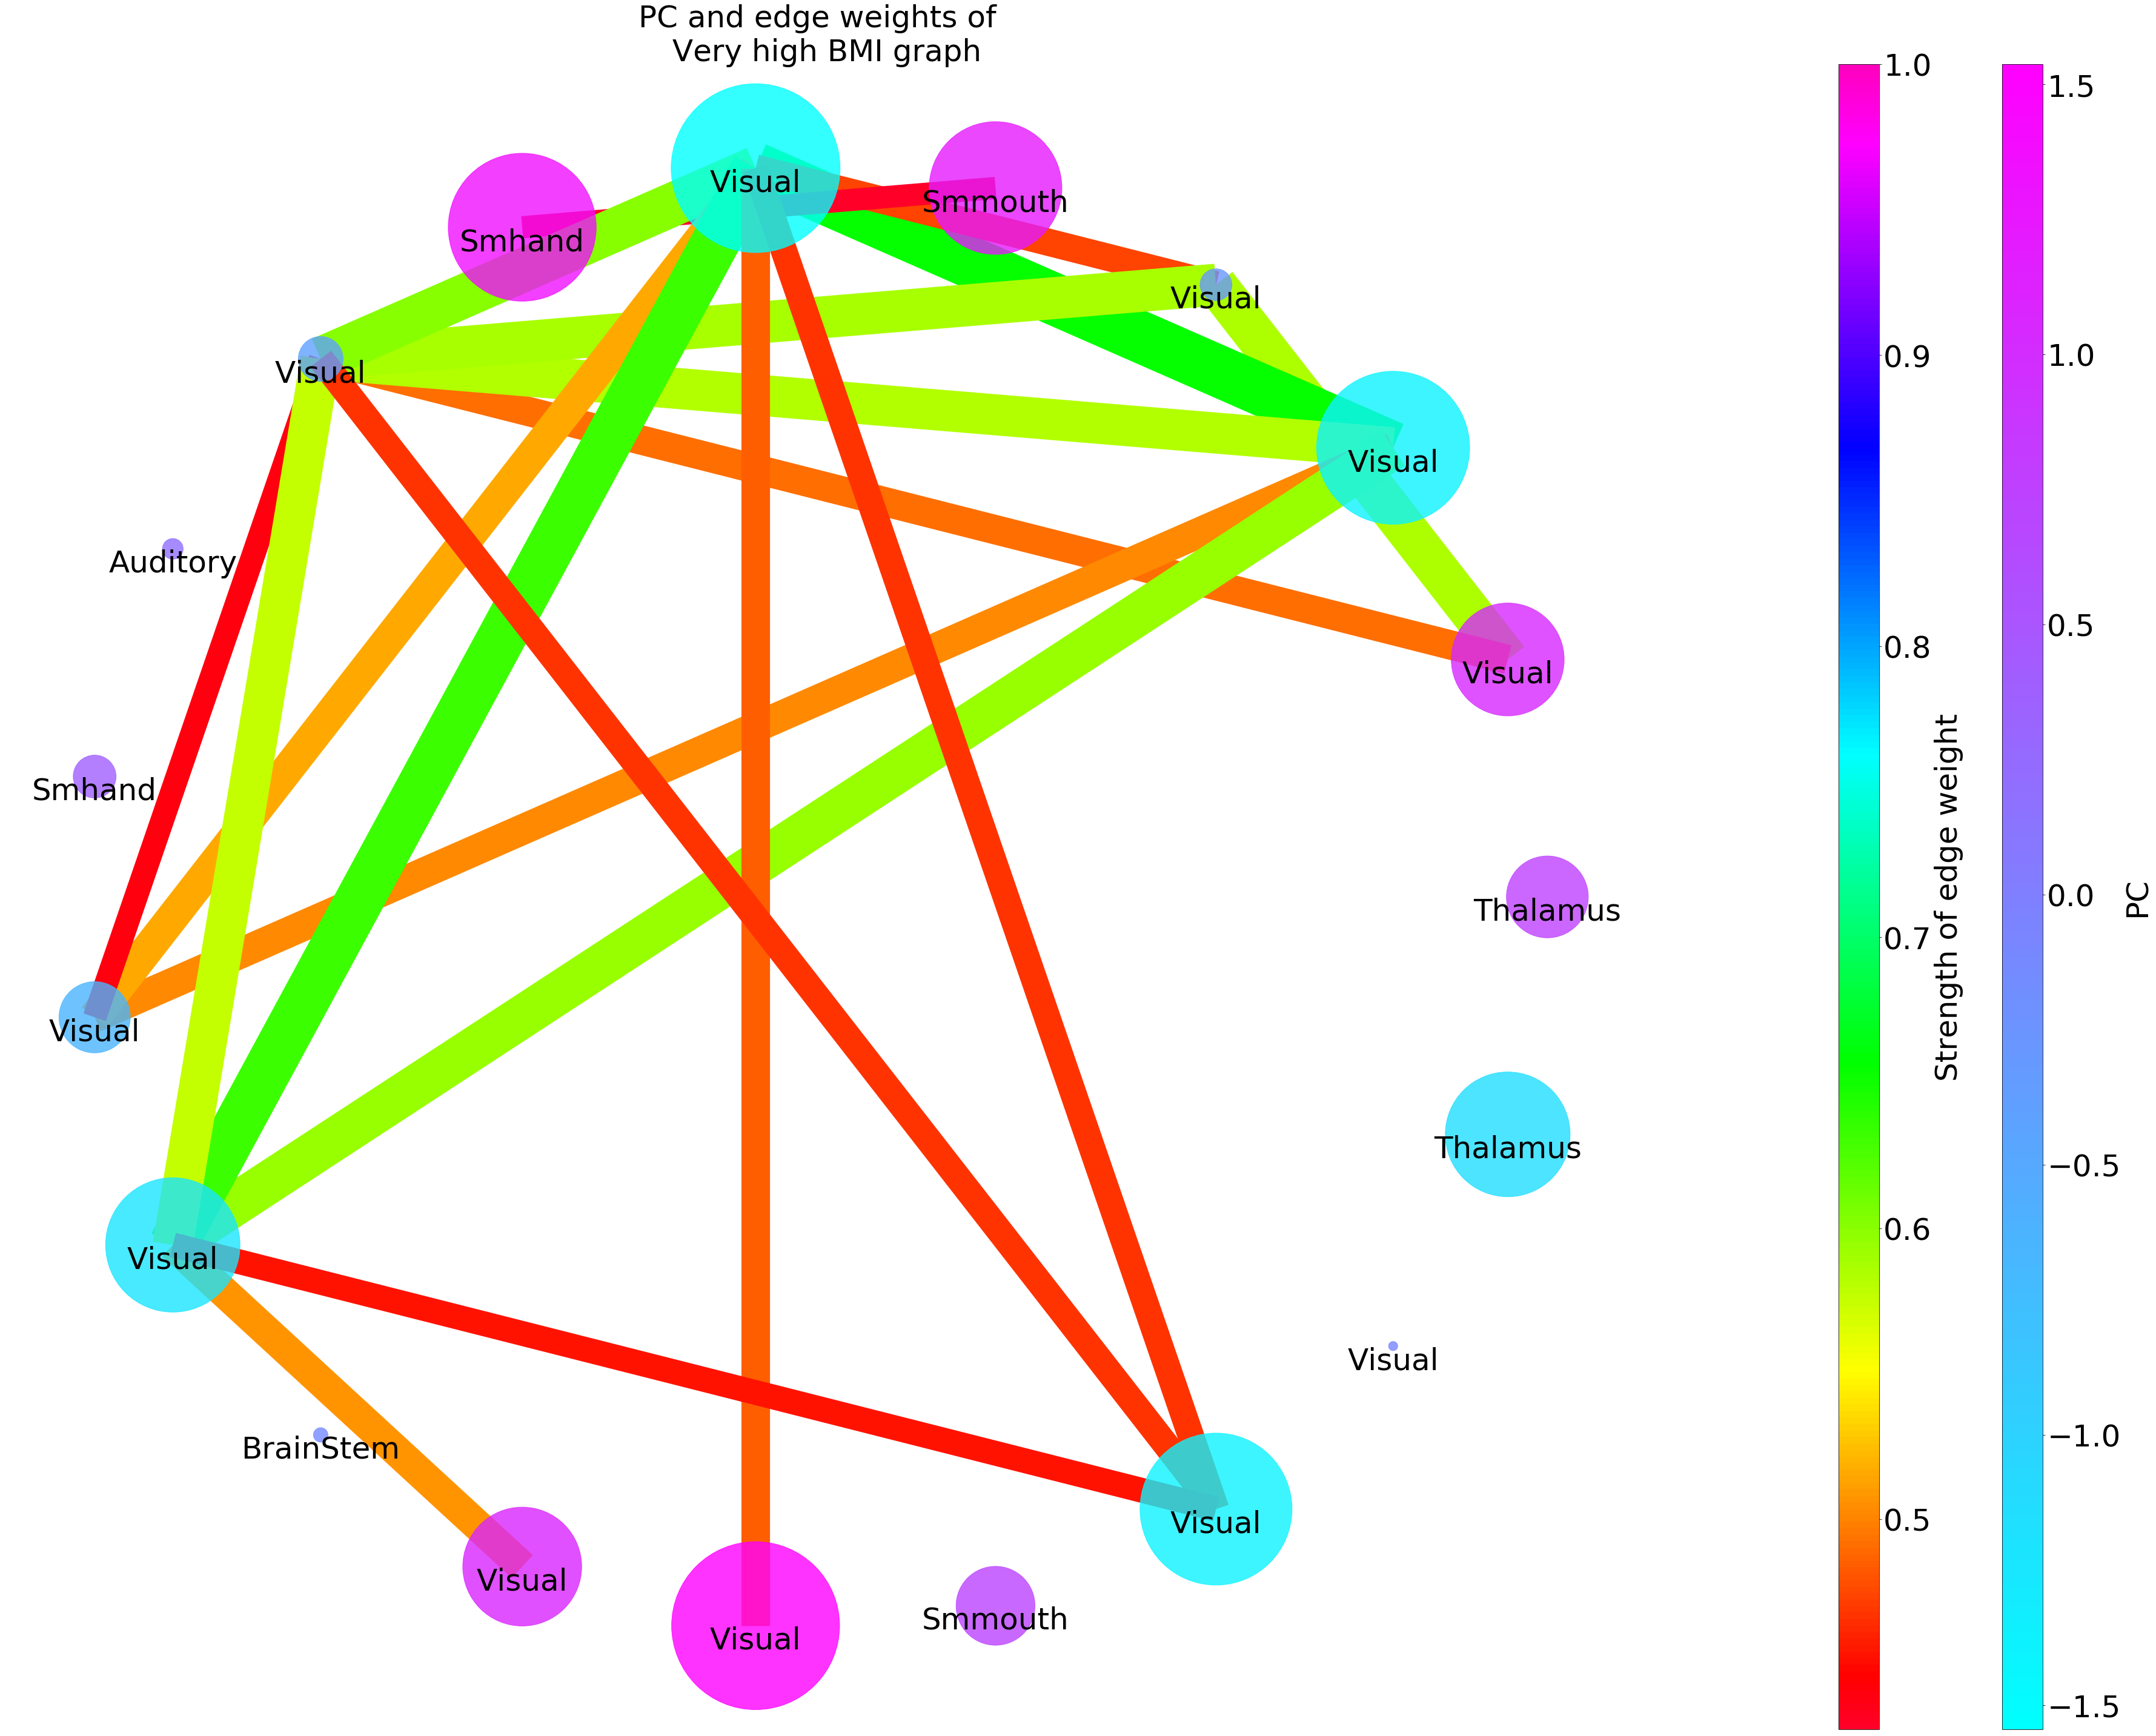

6


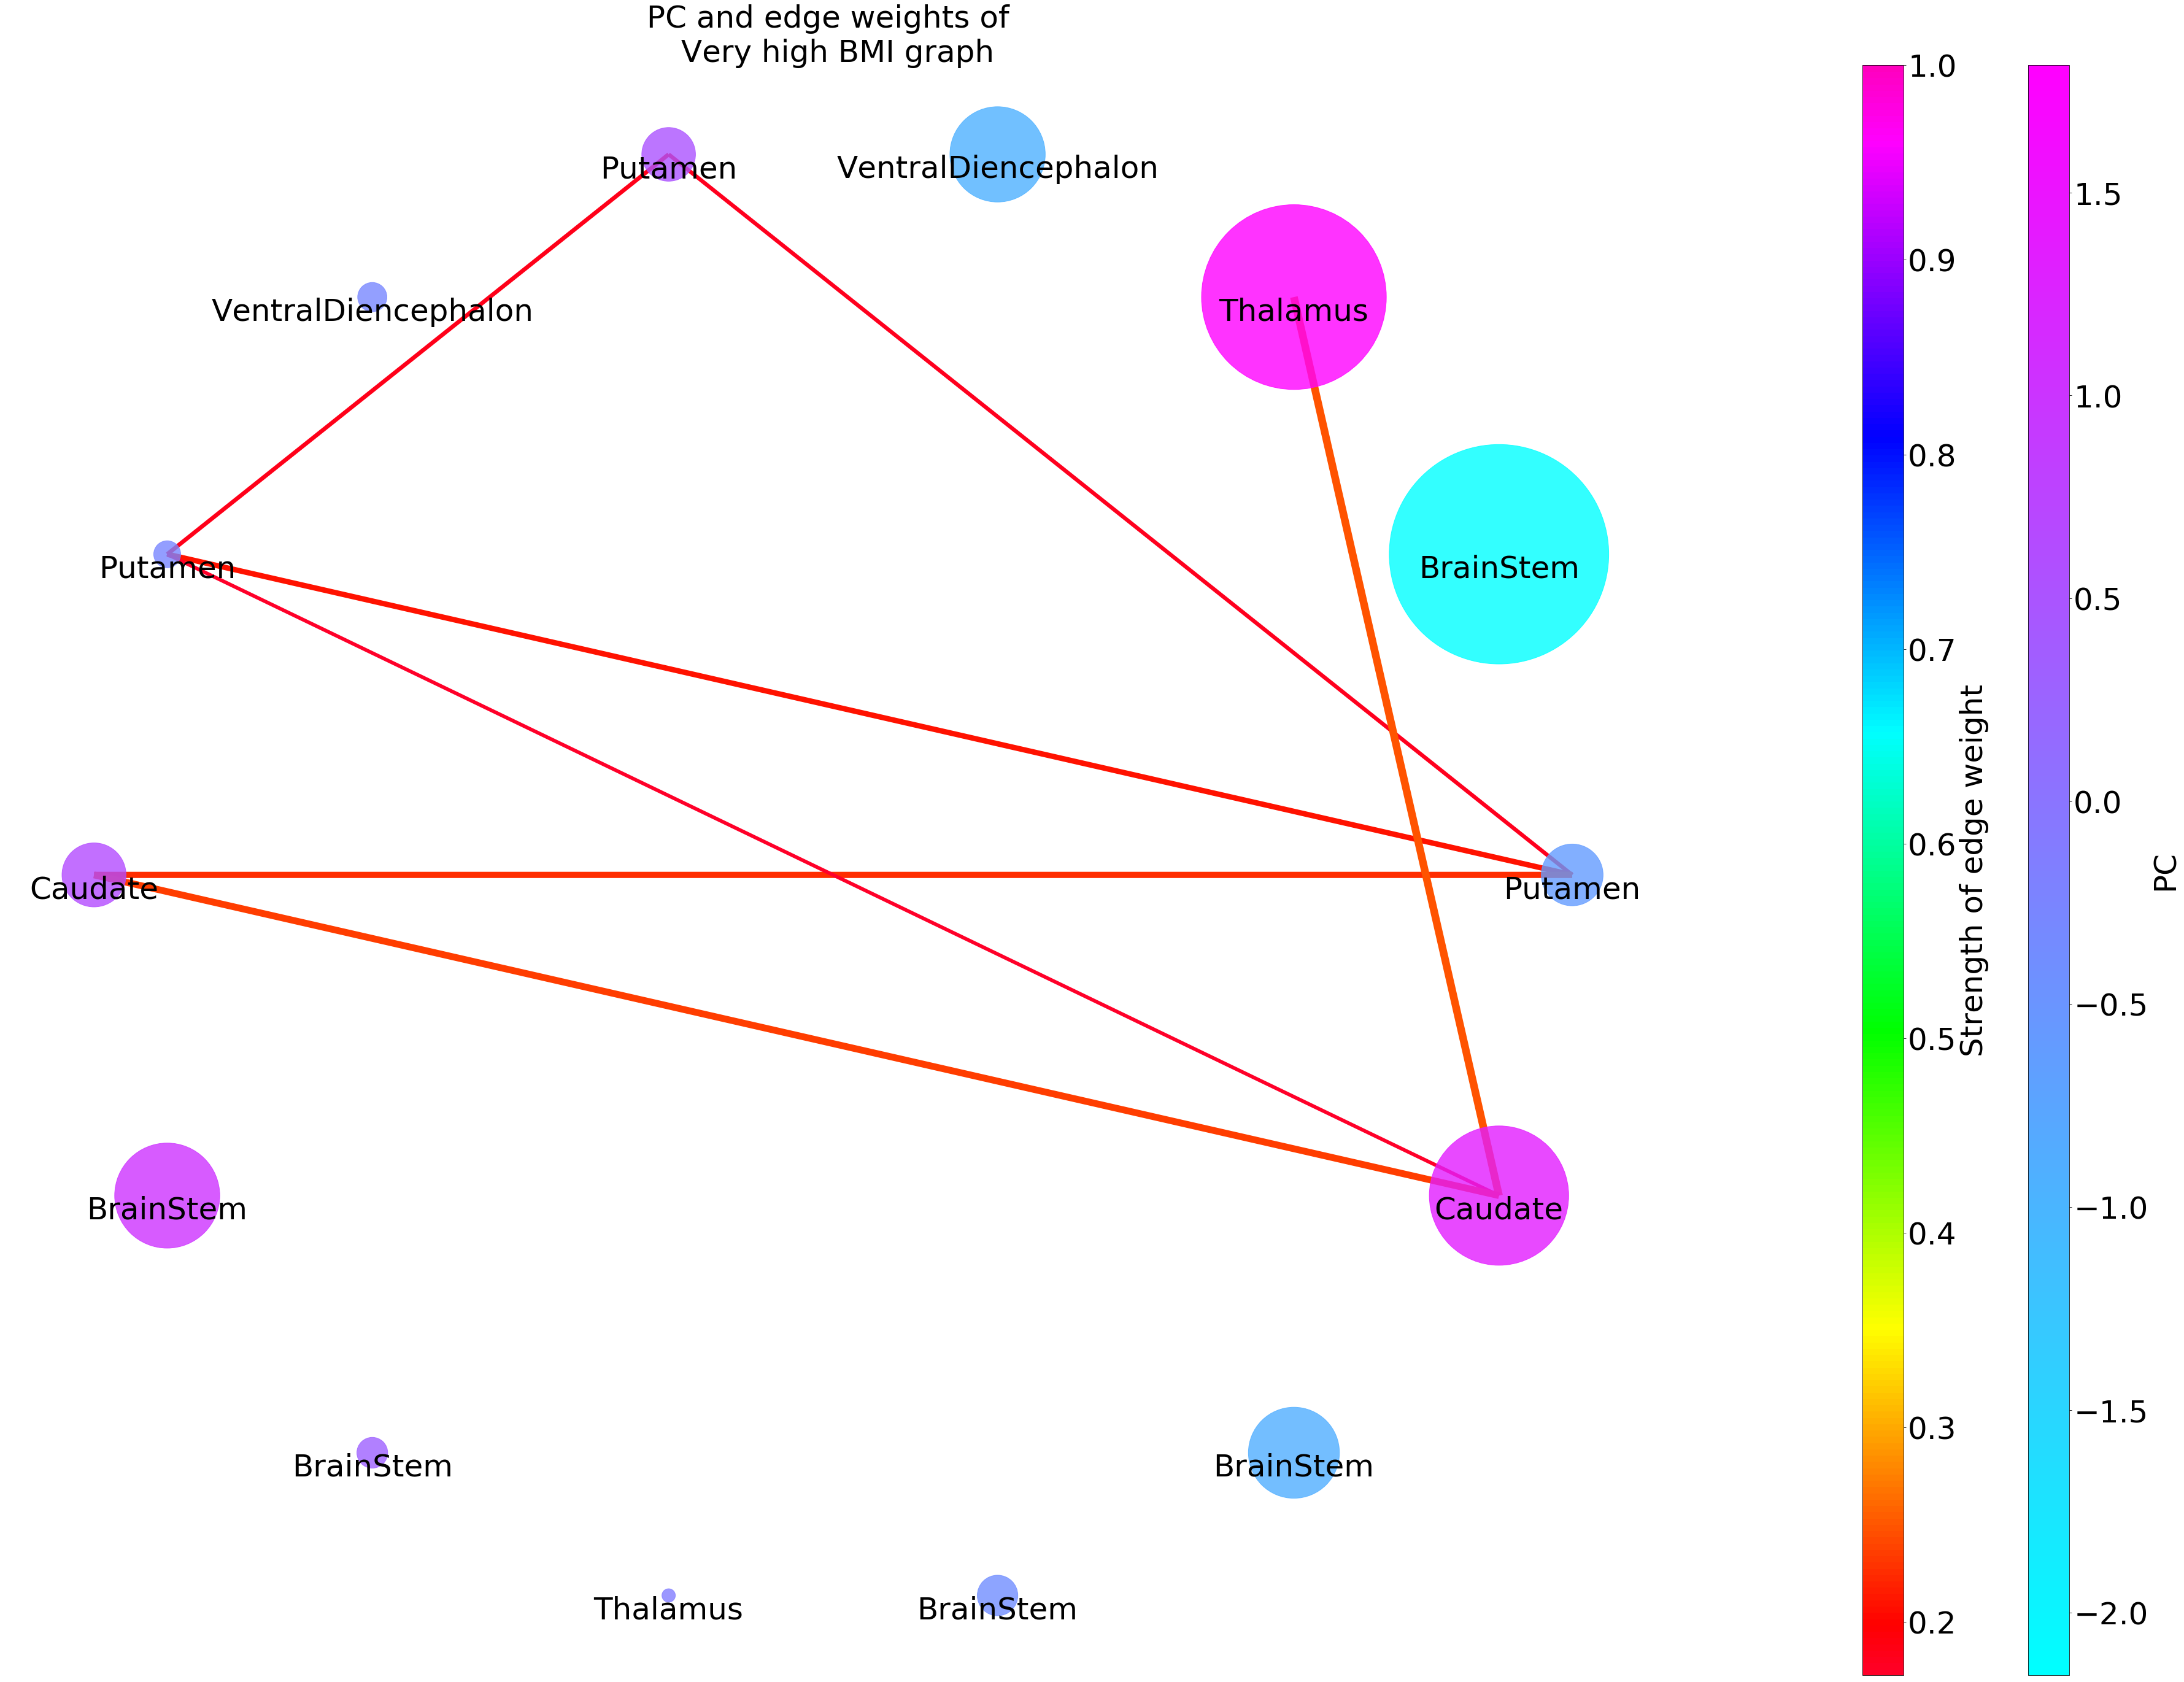

In [126]:
wb_con = {
    'no':{2:{},4:{}},
    'ov': {0:{}, 5:{}},
    'ob':{2:{}, 6:{}}
}

for group, mods in wb_con.items():
    print(group)
    for mod, blank in mods.items():
        print(mod)  
        wb_con[group][mod]=basic_graph(subgraph_dict[group][mod], 50000, 50, 'PC', (75,50), 80, basepath, '%s'%group, '%i'%mod)

## Get the colors for workbench

In [141]:
for group, mods in wb_con.items():
    print(group)
    for mod, data in mods.items():
        print(mod)
        writepath = os.path.join(basepath,'%s_%i.txt'%(group, mod))
        f = open(writepath, "w")
        for key, value in data.items():
            print(key)
            x = value[2]
            print(x)
            f.write('LABEL_%i\n'%(key+1))
            f.write('%i %i %i %i %i\n'%(key+1, x[0], x[1], x[2], x[3]))
        f.close()

no
2
2
[137. 118. 255. 255.]
3
[  0. 255. 255. 255.]
4
[240.  15. 255. 255.]
7
[ 40. 215. 255. 255.]
10
[  4. 251. 255. 255.]
12
[ 29. 226. 255. 255.]
15
[ 60. 195. 255. 255.]
16
[ 14. 241. 255. 255.]
17
[198.  57. 255. 255.]
18
[151. 104. 255. 255.]
19
[ 69. 186. 255. 255.]
20
[ 71. 184. 255. 255.]
22
[ 82. 173. 255. 255.]
26
[ 69. 186. 255. 255.]
27
[ 19. 236. 255. 255.]
29
[ 32. 223. 255. 255.]
30
[255.   0. 255. 255.]
33
[ 84. 171. 255. 255.]
34
[ 64. 191. 255. 255.]
37
[ 74. 181. 255. 255.]
40
[ 72. 183. 255. 255.]
42
[ 73. 182. 255. 255.]
44
[ 18. 237. 255. 255.]
46
[ 50. 205. 255. 255.]
80
[ 90. 165. 255. 255.]
87
[152. 103. 255. 255.]
95
[  5. 250. 255. 255.]
96
[101. 154. 255. 255.]
4
64
[  0. 255. 255. 255.]
66
[180.  75. 255. 255.]
67
[223.  32. 255. 255.]
68
[146. 109. 255. 255.]
75
[ 64. 191. 255. 255.]
14
[211.  44. 255. 255.]
78
[160.  95. 255. 255.]
48
[226.  29. 255. 255.]
86
[102. 153. 255. 255.]
25
[205.  50. 255. 255.]
63
[255.   0. 255. 255.]
62
[107. 148. 255. 255

## Get ICnames

In [42]:
g = subgraph_dict['ob'][6]
new={}
for x,y in nx.get_node_attributes(g, 'labels').items():
        new[x]=[y['IC'], y['area']]

In [43]:
new

{64: ['IC_64', 'Putamen'],
 97: ['IC_97', 'BrainStem'],
 66: ['IC_66', 'Thalamus'],
 98: ['IC_98', 'VentralDiencephalon'],
 68: ['IC_68', 'Putamen'],
 99: ['IC_99', 'VentralDiencephalon'],
 75: ['IC_75', 'Putamen'],
 78: ['IC_78', 'Caudate'],
 79: ['IC_79', 'BrainStem'],
 85: ['IC_85', 'BrainStem'],
 86: ['IC_86', 'Thalamus'],
 94: ['IC_94', 'BrainStem'],
 90: ['IC_90', 'BrainStem'],
 62: ['IC_62', 'Caudate']}